Question 1:  What is Anomaly Detection? Explain its types (point, contextual, and  collective anomalies) with examples.

Ans: Anomaly Detection
Anomaly detection is the process of identifying data points or patterns that deviate significantly from the normal or expected behavior in a dataset. It is used to detect errors, fraud, defects, or unusual events.

🔹 Types of Anomalies

Point Anomalies

A single data point is very different from the rest.

Example: A credit card transaction of ₹5,00,000 when typical transactions are ₹500–₹2000.

Contextual Anomalies

A data point is abnormal in a specific context (time, location, condition) but might be normal elsewhere.

Example: A temperature of 30 °C is normal in summer but anomalous in winter.

Collective Anomalies

A group of data points is abnormal together, even if individual points look normal.

Example: Sudden spike in website traffic from thousands of fake bots in a few seconds.



Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Ans: Isolation Forest detects anomalies by randomly partitioning the data space and isolating points; anomalies get isolated quickly because they are few and different. It works best on high-dimensional tabular data. DBSCAN is a density-based clustering algorithm that groups closely packed points into clusters and marks points in low-density regions as outliers. It is well-suited for spatial or geospatial datasets with noise. Local Outlier Factor (LOF) measures the local density of each point compared to its neighbors and identifies points that are much less dense than their surroundings as outliers. It is ideal for detecting local anomalies in dense datasets.


Question 3: What are the key components of a Time Series? Explain each with one
example.

Answer: Key Components of Time Series

Trend: Long-term movement — e.g., rising annual sales.

Seasonality: Regular repeating patterns — e.g., high electricity use in summer.

Cyclic: Irregular cycles — e.g., economic boom and recession.

Noise: Random fluctuations — e.g., daily stock price spikes.


Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Answer: Stationarity in Time Series

Meaning: Statistical properties (mean, variance) stay constant over time.

Test: Augmented Dickey–Fuller test (ADF test).

Make Stationary: Apply differencing, log transform, or remove trend/seasonality.


Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Answer:  AR (AutoRegressive) models use only past values to predict future values, while MA (Moving Average) models use past forecast errors (residuals) to predict. ARIMA combines AR and MA with differencing to make non-stationary data stationary, making it useful for time series without seasonality. SARIMA extends ARIMA by adding seasonal components, making it effective for data with clear seasonal patterns. SARIMAX further extends SARIMA by allowing external (exogenous) variables to be included, which is useful when outside factors also influence the time series.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

Answer:



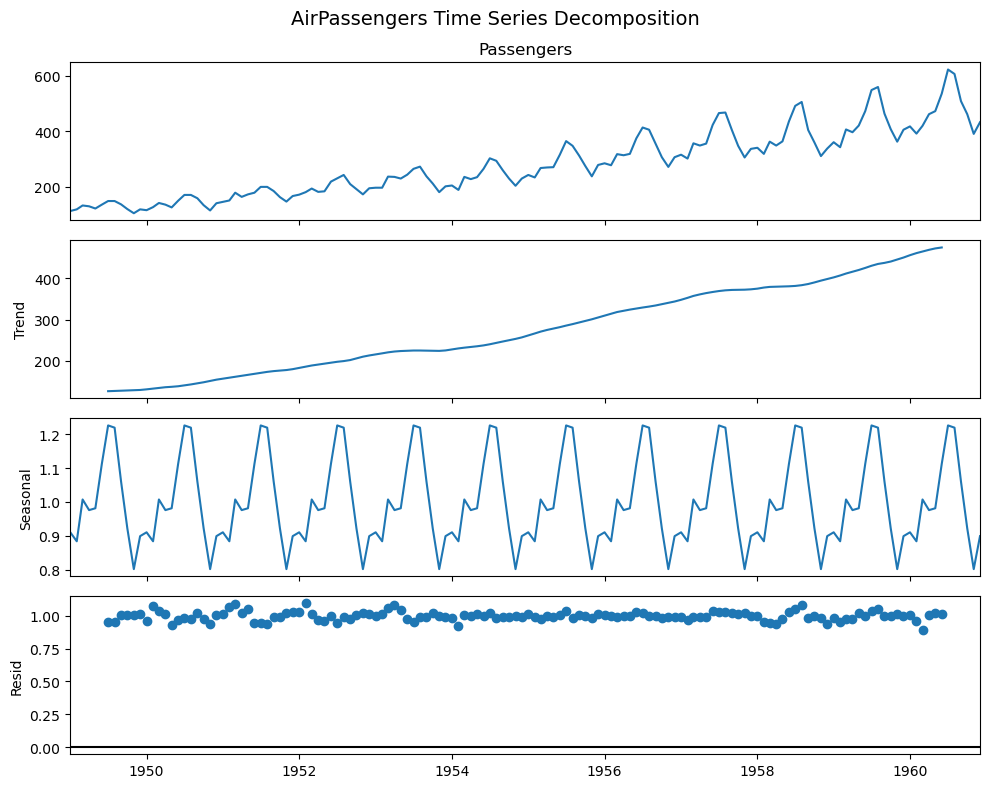

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\pw\AirPassengers.csv")

# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename column for easier reference
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot original series and its decomposition
fig = result.plot()
fig.set_size_inches(10, 8)
plt.suptitle("AirPassengers Time Series Decomposition", fontsize=14)
plt.tight_layout()
plt.show()



Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# -------------------------------
# 1. Load the dataset
# -------------------------------
# Replace the CSV path with your own dataset file
taxi_df = pd.read_csv("C:\Users\dell\OneDrive\Documents\pw\NYC_taxi_fare_data.csv")

# Use only numeric columns
data = taxi_df[['trip_distance', 'fare_amount']].copy()

# Handle any missing or invalid values
data = data.dropna()

# -------------------------------
# 2. Apply Isolation Forest
# -------------------------------
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)
labels = iso.fit_predict(data)

# -1 means anomaly, 1 means normal
data['anomaly'] = labels

# -------------------------------
# 3. Visualize anomalies
# -------------------------------
plt.figure(figsize=(8,6))

# Normal points
plt.scatter(
    data.loc[data['anomaly'] == 1, 'trip_distance'],
    data.loc[data['anomaly'] == 1, 'fare_amount'],
    c='blue', s=15, label='Normal'
)

# Anomalies
plt.scatter(
    data.loc[data['anomaly'] == -1, 'trip_distance'],
    data.loc[data['anomaly'] == -1, 'fare_amount'],
    c='red', s=25, label='Anomaly'
)

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest on NYC Taxi Fare Data")
plt.legend()
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


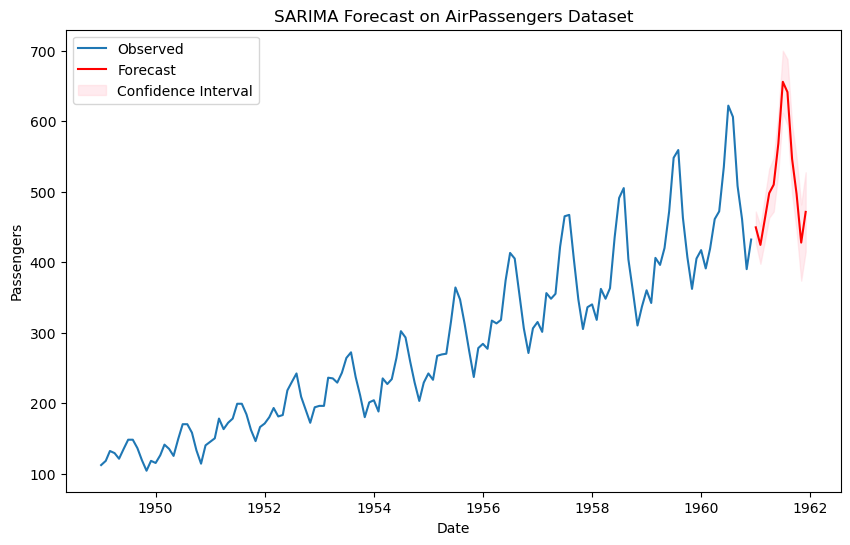

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
df = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\pw\AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Train SARIMA model
model = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = model.fit(disp=False)

# Forecast next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_mean = forecast.predicted_mean.astype(float)
forecast_ci = forecast.conf_int()
lower = forecast_ci.iloc[:, 0].astype(float).values
upper = forecast_ci.iloc[:, 1].astype(float).values

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Passengers'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, lower, upper, color='pink', alpha=0.3, label='Confidence Interval')
plt.title("SARIMA Forecast on AirPassengers Dataset")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
taxi_df = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\pw\NYC_taxi_fare_data.csv")

# Use only numeric columns for LOF
data = taxi_df[['trip_distance', 'fare_amount']].copy()

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
labels = lof.fit_predict(data)

# Plot anomalies
plt.figure(figsize=(8,6))
plt.scatter(
    data['trip_distance'], data['fare_amount'],
    c=(labels == -1),
    cmap='coolwarm', s=15
)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Local Outlier Factor on NYC Taxi Fare Data")
plt.colorbar(label='Outlier (1) / Inlier (0)')
plt.show()

print(taxi_df.columns)



Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

Answer:  

Real-Time Power Demand Forecasting

Anomaly Detection: Use Isolation Forest or Local Outlier Factor on sliding windows of streaming data to catch sudden spikes/drops.

Forecasting: Use SARIMAX to predict short-term demand using past usage + weather/region as external factors.

Validation: Rolling window backtesting, metrics like MAE/RMSE for forecasts and precision/recall for anomaly detection, plus live drift monitoring.

Business Impact: Enables early fault detection, better load balancing, and cost-efficient energy planning.